# Assignment 1

##### Exercise 1

a). A man has $n$ keys on a key ring, one of which opens the door to his apartment. Having celebrated a bit too much one evening, he returns home only to find himself unable to distinguish one key from another. Resourceful, he works out a fiendishly clever plan: He will choose a key at random and try it. If it fails to open the door, he will discard it and choose at random one of the remaining $n−1$ keys, and so on. Clearly, the probability that he gains entrance with the first key he selects is 1/n. Show that the probability the door opens with the third key he tries is also $1/n$.

b). Let $n=50$. In R, calculate the conditional probability of opening the door with each of the keys $k=2, \dots 50$ given that the previous keys did not work. Additionally, calculate the probability of opening the door with exactly the second, third, ..., 50th key. Plot both probabilities in the same graph. Interpret the results.

##### Solution

a). To solve this problem think about the joint probability of the events that the man has to go through to get to key number 3. Let the events be:

- A: the door does not open the door with the first key
- B: the door does not open the door with the second key
- C: the door opens with the third key

To find the probability that the door opens precisely with the third key lets find the joint probability. Remember we can apply conditional probability to find high-order intersections:

$P(A \cap B \cap C)=P(C | A \cap B) P(B | A) P(A)$

- The probability of not opening the door with the first key is $P(A)=\frac{n-1}{n}$
- The probability of not opening the door with the second key given that the first key did not work is $P(B|A)=\frac{n-2}{n-1}$
- The probability of opening the door given that keys 1 and 2 did not work is: $P(C|A\cap B)=\frac{1}{n-2}$

Therefore using the previous equation to find the probability that the door opens exactly with the third key:

$P(A \cap B \cap C)=\frac{1}{n-2} \times \frac{n-2}{n-1} \times \frac{n-1}{n}=\frac{1}{n}$


In [5]:
prod(4:1)

[1] 24

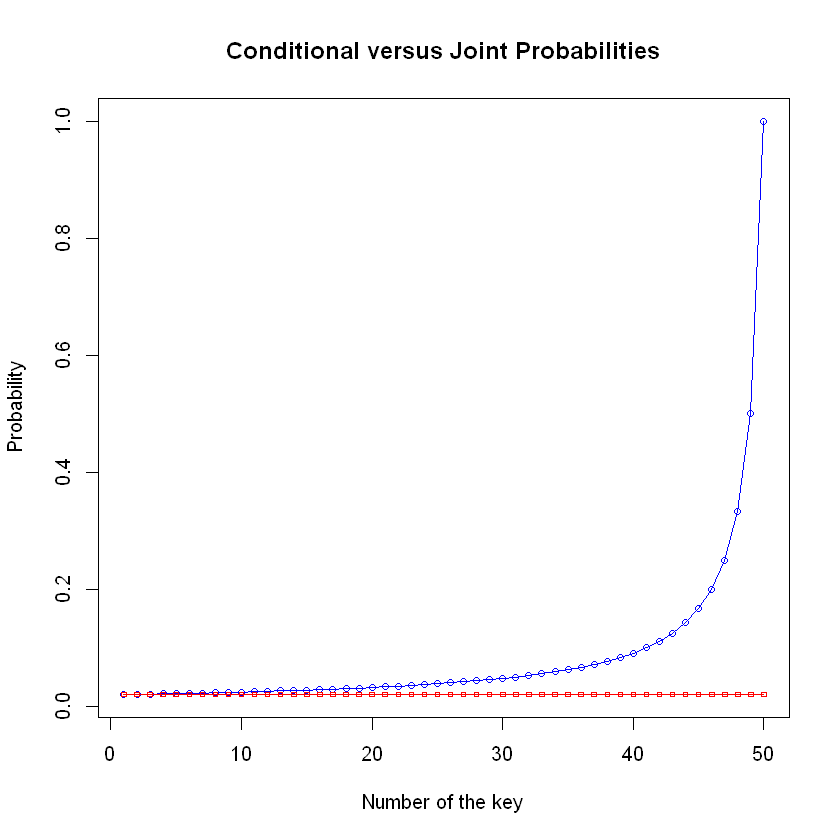

In [6]:
#b).

n<-50
cond_p<-1/n
joint_p<-1/n
for (k in 2:n-1){
    cond_p<-append(cond_p,1/(n-k))
    joint_p<-append(joint_p,prod((n-1):(n-k))/prod(n:(n-k)))
                }

plot(cond_p,type="o", col="blue",cex=0.8,ann=FALSE)
lines(joint_p,type="o", col="red",cex=0.5, pch = 0,ann=FALSE)
title(main="Conditional versus Joint Probabilities")
title(xlab="Number of the key")
title(ylab="Probability")
options(repr.plot.width=6, repr.plot.height=5)


##### Exercise 2

a). One chip is drawn at random from an urn that contains one white chip and one black chip. If the white chip is selected, we simply return it to the urn; if the black chip is drawn, that chip -together with another black- are returned to the urn. Then a second chip is drawn, with the same rules for returning it to the urn. Calculate the probability of drawing two whites followed by three blacks.

b). Simulate the empirical joint probabilities using sample sizes of 50 and 1000. That is, create a code that simulates the experiment of drawing 5 chips of the urn the the stated replacement rules. Repeat the experiment 50 and 1000 times. Then, calculate the probability of observing the sequence (white, white, black, black, black) for each experiment. Repeat the calculation of the probabilities 100 times and construct one vector containing the 50 and 1000 sample size joint probabilities. Finally, create a plot containing both histograms. Interpret the results. 

**Note:** This exercise is similar to example 2.4.7 in the Introduction to Mathematical Statistics and its Applications. I created a code to simulate that probability in the *'conditional_probability'* jupyter notebook. This exercise has an additional difficulty when compared with the code to simulate example 2.4.7 because of the rules of replacement. One approach I found useful was to create separate functions: 

- one function to produce the sample with replacement with the additional condition to add more black chips when a black chip is drawn
- one function to simulate the experiment of drawing the five chips
- one function to perform the experiment n time and calculate the proportion of times (probability) that the sequence (white, white, black, black, black) is observed.
- one loop to recalculate 100 times the probability of observing the sequence (white, white, black, black, black) for 50 and 1000 sample size (number of times that the experiment is repeated to calculate the probability).

##### Solution

a). This exercise is similar to example 2.4.7 in the Introduction to Mathematical Statistics and its Applications. It is important to recognize the composition of the urn after each type of chip is drawn. To calculate the probability define the following events:

- A: white chip is drawn on first selection
- B: white chip is drawn on second selection
- C: black chip is drawn on third selection
- D: black chip is drawn on fourth selection
- E: black chip is drawn on fifth selection

The objective is to find $P(A \cap B \cap C \cap D \cap E)$. Following the formula for high-order intersections:

$$P(A \cap B \cap C \cap D \cap E)=P(E | A \cap B \cap C\cap E) \cdot P(D | A \cap B \cap C) \cdot P(C | A \cap B) \cdot P(B | A) \cdot P(A)$$

The question now reduces to calculate the conditional probability of each event given the composition of the urn:

- $P(E | A \cap B \cap C\cap E)=3/4$. The urn starts with 1 withe and 1 black chip. After event A and B, the composition of the urn is not altered. However, events C and D add one black chip each. Then, in the fifth selection, there are 1 withe and 3 black chips.

- $P(D | A \cap B \cap C)=2/3$. Following the same logic, after events A,B and C, the composition of the urn is: 1 withe and 2 black chips.

- $P(C | A \cap B)=P(B | A)=P(A)=1/2$. Notice that the even of drawing a white chip does not alter the composition of the urn. Then, for events A, B and C the urn only contains 1 withe and 1 black chip.

With this information, we can calculate the joint probability as:

$$P(A \cap B \cap C \cap D \cap E)=\frac{3}{4} \times \frac{2}{3} \times \frac{1}{2} \times \frac{1}{2} \times \frac{1}{2}=0.0625$$

In [2]:
#b).
#define the function containing the sample rules
sample_r<-function(x){
    s<-sample(x,1)
    if (s=='B'){x<-append(x,'B')}
    r<-c(s,x)
}

In [3]:
#define the function to perform the experiment
experiment<-function(x){
    res<-sample_r(u)              #initialize a vector with the first result of the sample
    cr<-res[1]                    #vector containing the drawn chips

    #create loop to repeat the sample four more times
    for (j in 1:4){
        res<-sample_r(res[2:length(res)])
        cr<-append(cr,res[1])
    }
    cr
}

In [4]:
#define the function to create the empirical probability of obtaining the sequence W,W,B,B,B for different sample sizes:
prob<-function(n,u){
    event<-vector()
    for (i in 1:n){
        event<-append(event,all(experiment(u)==c('W','W','B','B','B'))*1)
    }
    
    mean(event)
}

In [5]:
#create the urn containing the two initial chips
u<-c('W','B')

#Perform the simulation

prob_50<-vector()
prob_1000<-vector()

for (j in 1:100){
    prob_50<-append(prob_50,prob(50,u))
    prob_1000<-append(prob_1000,prob(1000,u))
}

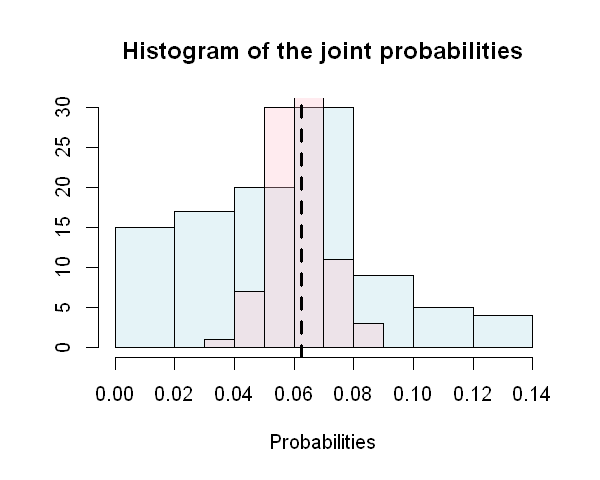

In [6]:
#create graph
c1 <- rgb(173,216,230,max = 255, alpha = 80, names = "lt.blue")
c2 <- rgb(255,192,203, max = 255, alpha = 80, names = "lt.pink")

h1<-hist(prob_50, breaks=9,plot = FALSE)
h2<-hist(prob_1000, breaks=4,plot = FALSE)

plot(h1,ann=FALSE, col=c1) 
plot(h2, add = TRUE, col=c2)
options(repr.plot.width=5, repr.plot.height=4)
title(main="Histogram of the joint probabilities")
title(xlab="Probabilities")
abline(v=0.0625,col="black",lwd=3, lty=2)